The purpose of this notebook is to get some insights from the Kaggle NETFLIX dataset and answer the following questions: 
<br>
<ul>
    <li>Which director made the most shows?
    <li>Which actor/actress was included in most of the shows?
    <li>Which movie/show is the most watch in each country?
    
</ul>




## Setup

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
%matplotlib inline

In [190]:
netflix_df = pd.read_csv("netflix_titles.csv")

#helper function for generating barplots
def plot_data(xaxis,yaxis,title,filename):
    plt.figure(figsize=(15,10))
    sns.barplot(x=xaxis,y=yaxis)
    plt.xticks(rotation=90)
    plt.title(title,color = 'blue',fontsize=20)
    plt.savefig(filename)
    plt.show()

#helper function to split the cast column    
def get_top_actors_by_type(df):
    actor_titles_dict = defaultdict(list)
    for i in range(len(df)) : 
      title = df.iloc[i, 0]
      casts = df.iloc[i, 1].split(", ") 
      for actor in casts:
          if actor in actor_titles_dict:
              actor_titles_dict[actor].append(title)
          else:
              actor_titles_dict[actor] = [title]

    actor_titles_count_dict = {}
    for actor, titles in actor_titles_dict.items():
        actor_titles_count_dict[actor] = len(titles)
    return actor_titles_count_dict






# Data Cleaning and Wrangling

In [131]:
#check which columns have null values
netflix_df.isnull().sum()



show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [197]:
#split duration to [duration_no,duration_metric] columns and convert the duration_no to numeric
netflix_df[['duration_no','duration_metric']] = netflix_df.duration.apply(lambda x: pd.Series(str(x).split(" "))) 
netflix_df['duration_no'] = pd.to_numeric(netflix_df['duration_no'])

In this dataset, the columns that we need for analysis are the title,director, cast and country. 
We can see that the these columns contain null values, for "rating" and "country" columns we can fill them up with the mode,
for the director column will just leave it as it is.

In [198]:
#replace the country and ratings column with the mode and drop the fields that do not have any values and will not have a big effect on the questions that we want to answer
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df.dropna(subset=['cast'],axis = 0,inplace = True)
netflix_df.isnull().sum()



show_id               0
type                  0
title                 0
director           2090
cast                  0
country               0
date_added           10
release_year          0
rating                0
duration              0
listed_in             0
description           0
duration_no           0
duration_metric       0
dtype: int64

# Question 1: Who is the director with the most number of movies/shows directed?


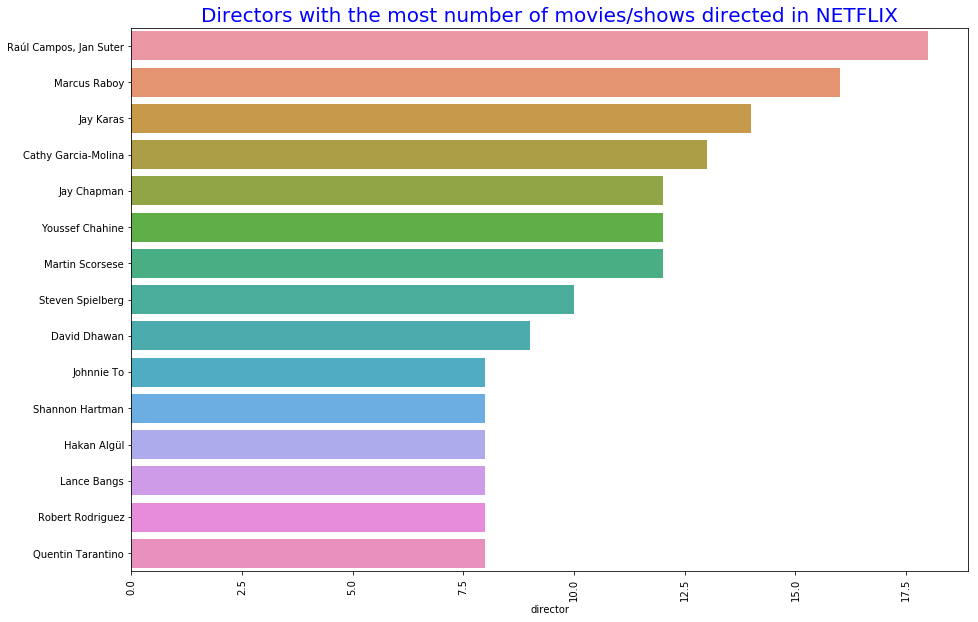

In [191]:
netflix_directors = pd.DataFrame(netflix_df['director'].value_counts()).sort_values(by='director',ascending=False)[:15]
plot_data(netflix_directors.director,netflix_directors.index,'Directors with the most number of movies/shows directed in NETFLIX',"top_directors.png")



# Question 2: Who is the actor with the most number of movies appearances?

To answer this question I needed to break the cast column into individual values and map them to the titles column using the helper function "get_top_actors_by_type" which was defined in the setup section.

In [179]:
title_cast_columns = ["title","cast","type"]
title_cast_country = ["country","title","cast"]
title_cast_dataset= netflix_df[title_cast_columns]
title_cast_show = title_cast_dataset[title_cast_dataset['type']=='TV Show']
title_cast_movie = title_cast_dataset[title_cast_dataset['type']=='Movie']
country_title_cast_dataset = netflix_df[title_cast_country]
    
top_actors_movie = pd.DataFrame.from_dict(get_top_actors_by_type(title_cast_movie),orient='index',columns=["Count"])
top_actors_show = pd.DataFrame.from_dict(get_top_actors_by_type(title_cast_show),orient='index',columns=["Count"])


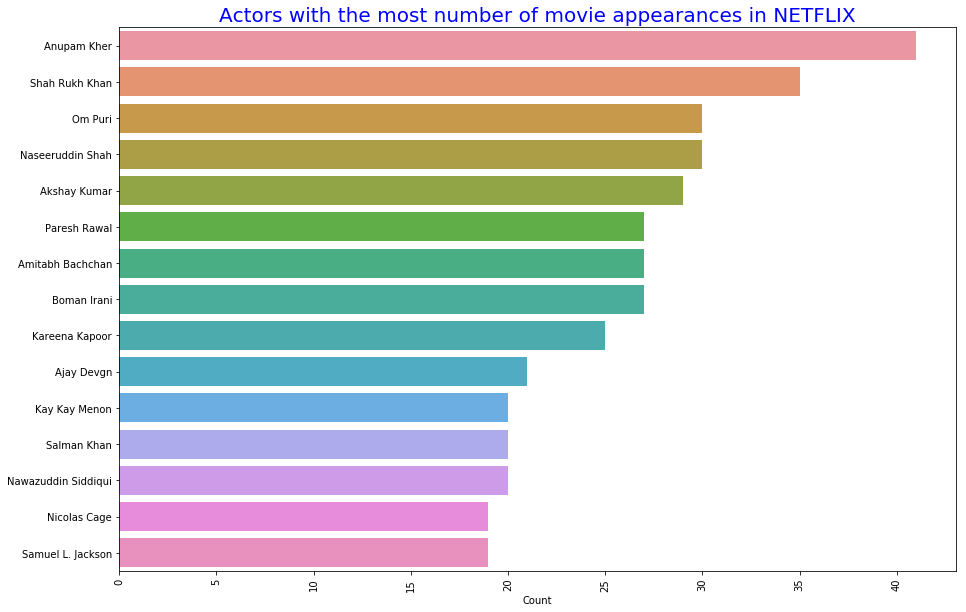

In [193]:
top_actors = top_actors_movie.sort_values(by='Count',ascending=False)[:15]
plot_data(top_actors.Count,top_actors.index,'Actors with the most number of movie appearances in NETFLIX',"top_actors_movies.png")

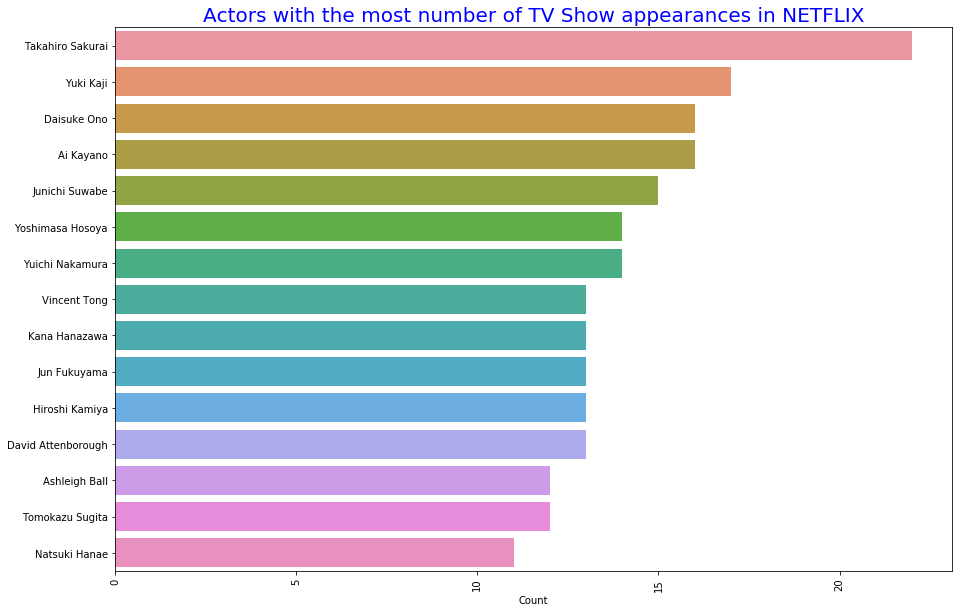

In [194]:
top_actors = top_actors_show.sort_values(by='Count',ascending=False)[:15]
plot_data(top_actors.Count,top_actors.index,'Actors with the most number of TV Show appearances in NETFLIX',"top_actors_tvshows.png")

# Q3 Which country produced the most content?

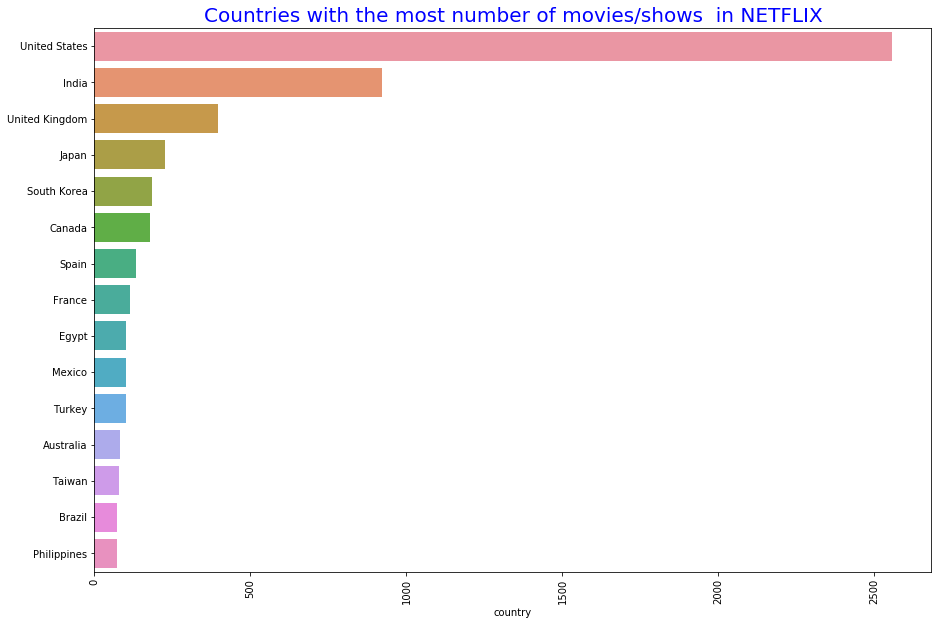

In [195]:
top10_countries = pd.DataFrame(netflix_df['country'].value_counts()).sort_values(by='country',ascending=False)[:15]
plot_data(top10_countries.country,top10_countries.index,'Countries with the most number of movies/shows  in NETFLIX',"top_country.png")

# TV Shows with the most number of seasons

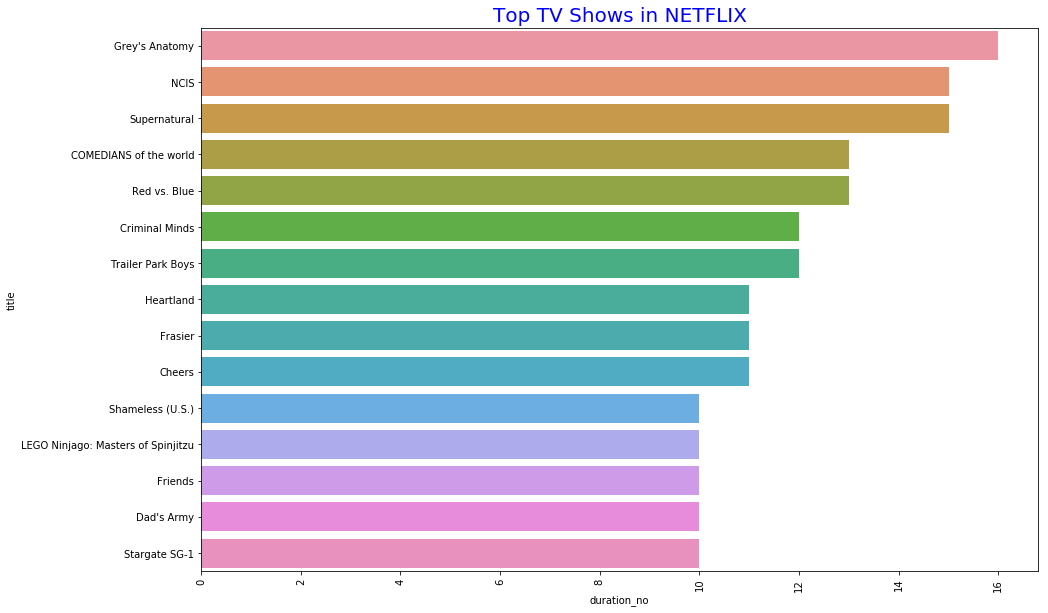

In [199]:
# TV shows with the most number of seasons
netflix_tvshows = netflix_df[netflix_df['type']=='TV Show']
top_tvshows = netflix_tvshows[['title','duration_no']].sort_values(by='duration_no',ascending=False)[:15]
plot_data(top_tvshows.duration_no,top_tvshows.title,'Top TV Shows in NETFLIX',"top_shows.png")

# Top Movies

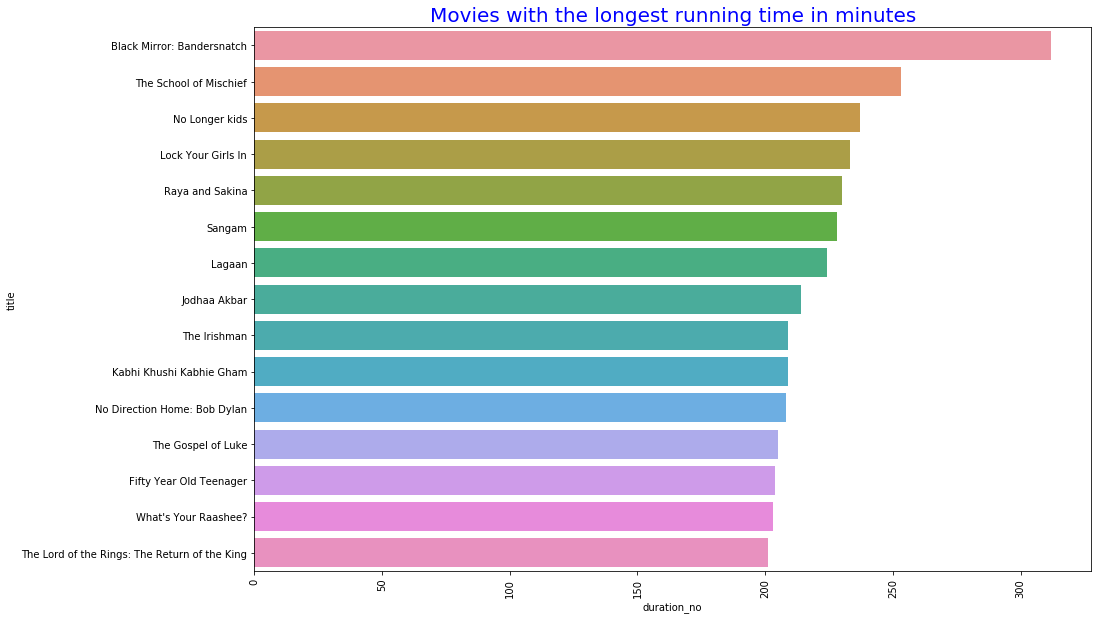

In [200]:
# TV shows with the most number of seasons
netflix_movies = netflix_df[netflix_df['type']=='Movie']
top_movie = netflix_movies[['title','duration','duration_no']].sort_values(by='duration_no',ascending=False)[:15]
plot_data(top_movie.duration_no,top_movie.title,'Movies with the longest running time in minutes',"top_movies.png")

Conclusion
In this article, we learned some interesting facts about the NETFLIX data from Kagle, this includes the following.
- Actors with the most number of appearances in a show or movie are coming from India
- Country with the most number of  content is from the United States
- TV with the most number of seasons
- Movies with the longest runtimes

What type of content 